Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

 

Откуда брать данные

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

Данные IMDB;
Данные NYC;
Данные NBA.


In [199]:

# Стандартное импортирование plotly
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
 
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,12

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

# библиотека для изображений
import cv2

Для визуализации данных выбрал датасет NBA. https://www.kaggle.com/drgilermo/nba-players-stats#player_data.csv

### 1. Посморим на представленные данные

In [135]:
player_data=pd.read_csv('player_data.csv')
player_data.head(5)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
players=pd.read_csv('players.csv')
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [200]:
seasons_stats=pd.read_csv('seasons_stats.csv')
seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


### 2. Кто же принес больше всего очков за всю карьеру?

In [31]:
all_points_stats=seasons_stats[['Player','PTS']]
all_points_stats=all_points_stats.groupby('Player').agg({'PTS':['sum']})

stats.head()

,Player,sum
0,Kareem Abdul-Jabbar*,38387.0
1,Karl Malone*,36928.0
2,Wilt Chamberlain*,33953.0
3,Kobe Bryant,33643.0
4,Michael Jordan*,32292.0


In [32]:
all_points_stats=all_points_stats['PTS']['sum'].sort_values(ascending=False).reset_index().head(20)
all_points_stats.head()

,Player,sum
0,Kareem Abdul-Jabbar*,38387.0
1,Karl Malone*,36928.0
2,Wilt Chamberlain*,33953.0
3,Kobe Bryant,33643.0
4,Michael Jordan*,32292.0


Text(40500, 0, 'Leader of this raiting')

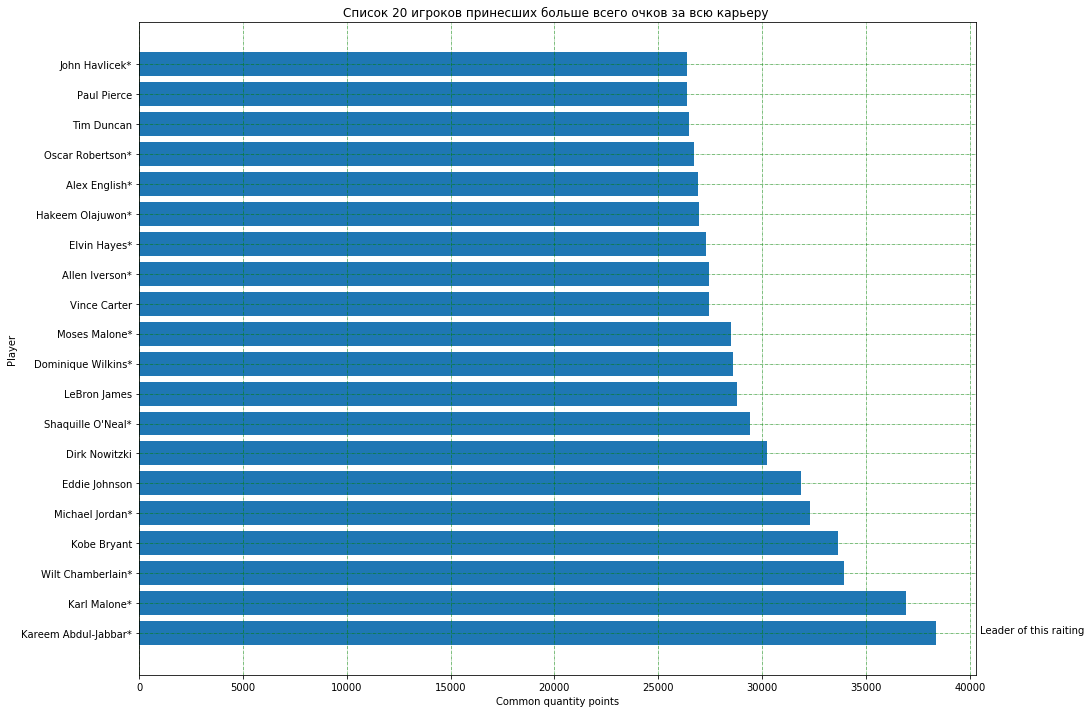

In [33]:
plt.barh(all_points_stats['Player'], all_points_stats['sum'], height=0.8)
plt.xlabel('Common quantity points')
plt.ylabel('Player')
plt.title('Список 20 игроков принесших больше всего очков за всю карьеру ')
plt.grid(color='g', linestyle='-.', linewidth=0.5)
plt.text(40500, 0, 'Leader of this raiting'  )

### 3. Теперь рассмотрим именно результативность, то есть общее кол-во очков в зависимости от кол-ва игр за карьеру

In [74]:
# кол-во игр за всю кариьеру
result_stats=seasons_stats[['Player','PTS','G']]
result_stats=result_stats.groupby('Player').agg({'PTS':['sum'],'G':['sum']})
result_stats.head()

,PTS,G
,sum,sum
Player,,
A.C. Green,12928.0,1361.0
A.J. Bramlett,8.0,8.0
A.J. English,1502.0,151.0
A.J. Guyton,442.0,80.0
A.J. Hammons,48.0,22.0


In [75]:
# среднее кол-во очков
for i in range(len(result_stats)):
    result_stats['mean_pts_in_game']=result_stats['PTS']['sum']/result_stats['G']['sum']


In [76]:
result_stats=result_stats.sort_values('mean_pts_in_game', ascending=False).reset_index().head(20)
result_stats.head()

,Player,PTS,G,mean_pts_in_game
,,sum,sum,
0,Wilt Chamberlain*,33953.0,1118.0,30.369410
1,Michael Jordan*,32292.0,1072.0,30.123134
2,Elgin Baylor*,23149.0,846.0,27.362884
3,Kevin Durant,19121.0,703.0,27.199147
4,LeBron James,28787.0,1061.0,27.131951


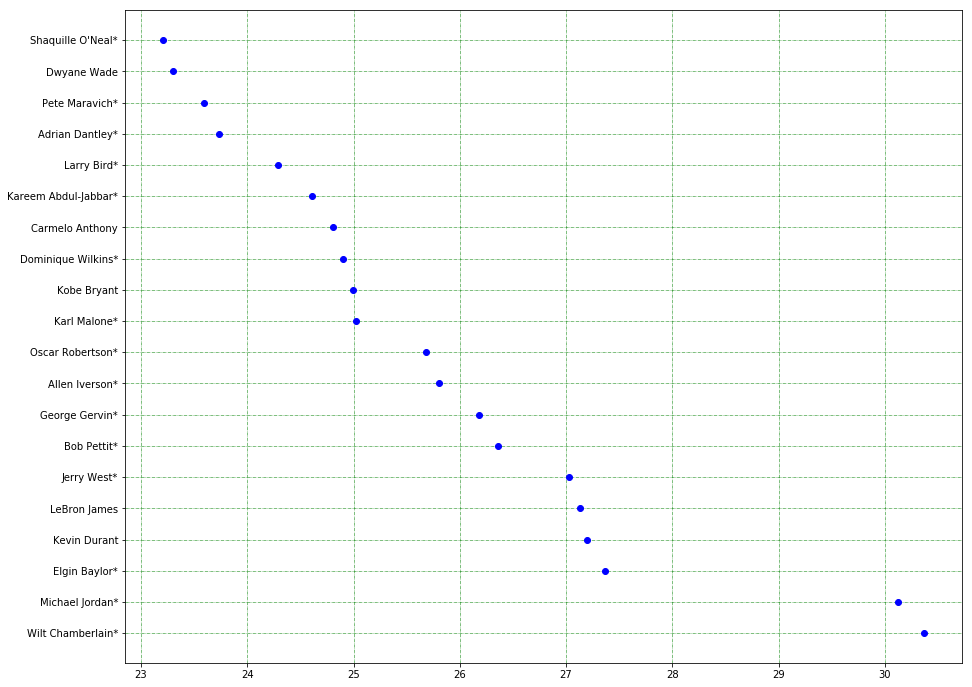

In [103]:
plt.plot(result_stats['mean_pts_in_game'], result_stats['Player'],  'bo')
plt.grid(color='g', linestyle='-.', linewidth=0.5)

Из графика видно, что только двое смогли пересечь отметку 30 очков за игру.

### 4. Кол-во игроков в зависимости от позиции.

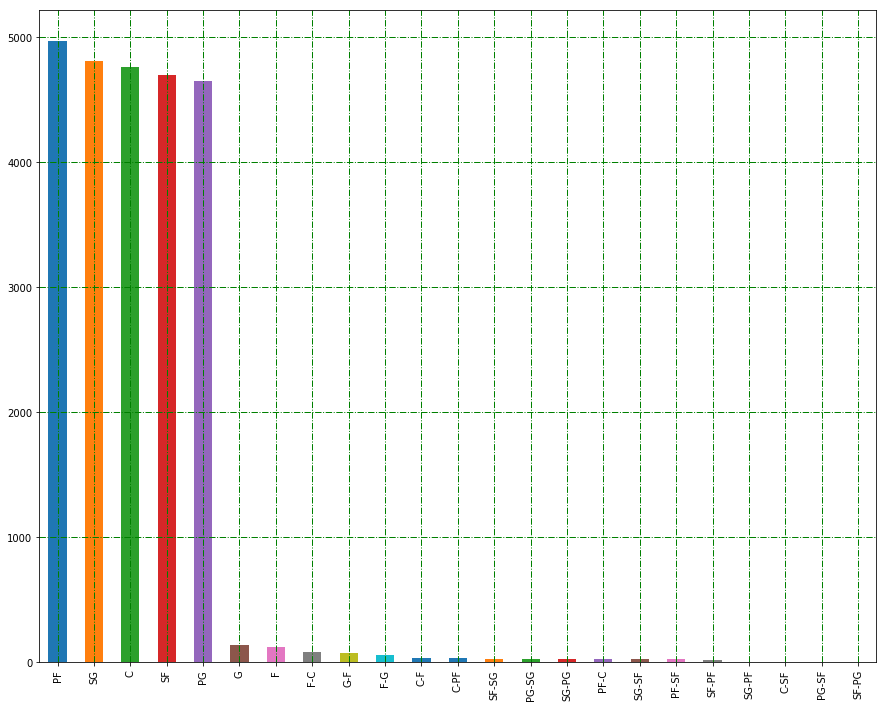

In [128]:
seasons_stats['Pos'].value_counts().plot(kind='bar')
plt.grid(color='g', linestyle='-.', linewidth=1)

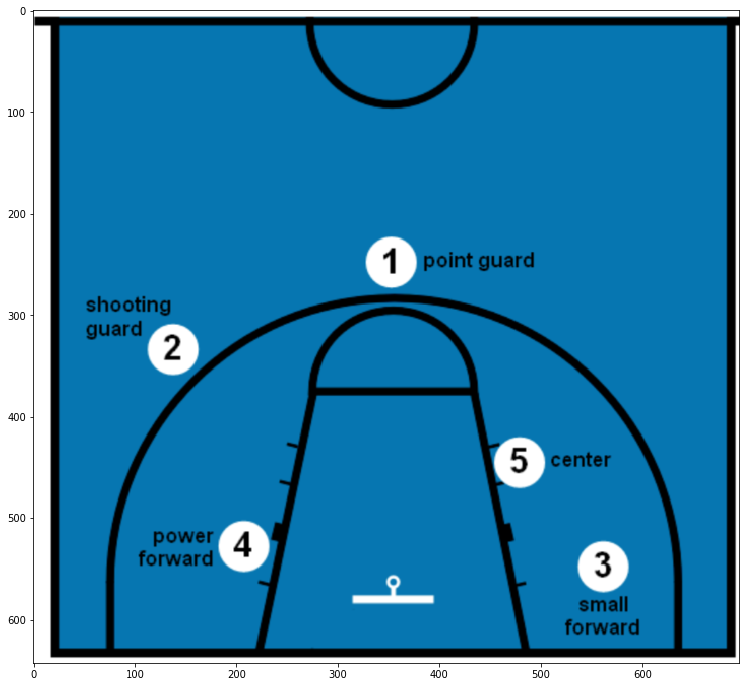

In [125]:
img=cv2.imread('positions.png')
plt.imshow(img)

Исходя из диаграммы и изображения выше, больше всех игроков на позиции Power Forward.

### 5. Всегда было интересно прослеживается ли зависимость роста и веса в зависимости от позиции?

In [143]:
# объединим данные для анализа
positions=seasons_stats[['Pos','Player']]
positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 2 columns):
Pos       24624 non-null object
Player    24624 non-null object
dtypes: object(2)
memory usage: 385.9+ KB


In [144]:
parametres=players[['Player','height','weight', 'born']]
parametres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 4 columns):
Player    3921 non-null object
height    3921 non-null float64
weight    3921 non-null float64
born      3921 non-null float64
dtypes: float64(3), object(1)
memory usage: 122.6+ KB


In [164]:
# объединяем и удаляем дубликаты
df=pd.merge(parametres, positions,  how='inner', on='Player').drop_duplicates().reset_index().drop(columns=['index'])
df.head()

,Player,height,weight,born,Pos
0,Curly Armstrong,180.0,77.0,1918.0,G-F
1,Cliff Barker,188.0,83.0,1921.0,SG
2,Leo Barnhorst,193.0,86.0,1924.0,SF
3,Leo Barnhorst,193.0,86.0,1924.0,F-G
4,Ed Bartels,196.0,88.0,1925.0,F


In [184]:
#  извлечем основные позиции, исходя из данных предыдущего пункта
df=df.query('Pos in ("SF","PF","SG","PG","C")')
df.head()

,Player,height,weight,born,Pos
1,Cliff Barker,188.0,83.0,1921.0,SG
2,Leo Barnhorst,193.0,86.0,1924.0,SF
8,Nelson Bobb,183.0,77.0,1924.0,PG
10,Vince Boryla,196.0,95.0,1927.0,SF
12,Don Boven,193.0,95.0,1925.0,SG


In [187]:
 from sklearn.preprocessing import LabelEncoder

In [190]:
le = LabelEncoder()
le.fit(df['Pos'])


LabelEncoder()

In [191]:
le.classes_

array(['C', 'PF', 'PG', 'SF', 'SG'], dtype=object)

In [195]:
df['Pos']=le.transform(df['Pos']) 


In [197]:
df.head()

,Player,height,weight,born,Pos
1,Cliff Barker,188.0,83.0,1921.0,4
2,Leo Barnhorst,193.0,86.0,1924.0,3
8,Nelson Bobb,183.0,77.0,1924.0,2
10,Vince Boryla,196.0,95.0,1927.0,3
12,Don Boven,193.0,95.0,1925.0,4


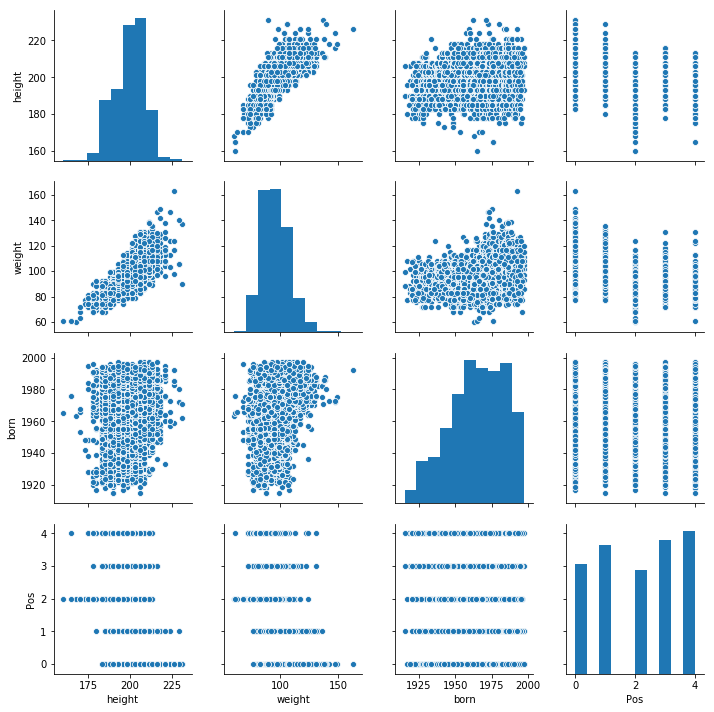

In [201]:
sns_plot = sns.pairplot(
    df[['height', 'weight', 'born','Pos']]);
sns_plot

1.Прослеживается небольшая тенденция в том,что в среднем рост и вес позиции PG меньше относительно позиции С. 

2.Очевидно, что есть зависимость роста от веса.

3.А так же игроки ближе к 2000-м годам в среднем немного выше.

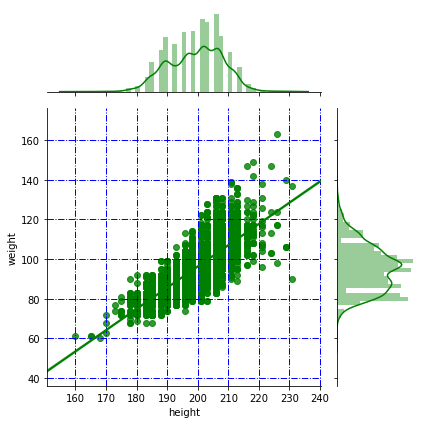

In [211]:
sns.jointplot(x='height', y='weight', 
              data=df, kind='reg', color='g', ratio=3)
plt.grid(color='b', linestyle='-.', linewidth=1)

Построили линейную регрессию по данным роста и веса. 